---
# NLP Explore Exercises
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
import acquire as a
import prepare as p
import explore as e

---
## 1.

Spam Data
- Load the spam data set.

In [2]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
# # do a little cleaning before getting started
# df = p.prep_nlp(df, original_text_col = 'text')

In [5]:
df['clean'] = df.text.apply(p.basic_clean_spam).apply(p.tokenize)

In [6]:
df.head()

,label,text,clean
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [7]:
# take a look at value counts
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Imbalanced classes, keep this in mind moving forward

- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [8]:
list(nltk.bigrams(df.clean[0].split()))

[('go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat')]

In [9]:
# combine all words from each label as a single corpus
ham_words = ' '.join(df[df.label == 'ham'].clean)
spam_words = ' '.join(df[df.label == 'spam'].clean)
all_words = ' '.join(df.clean)

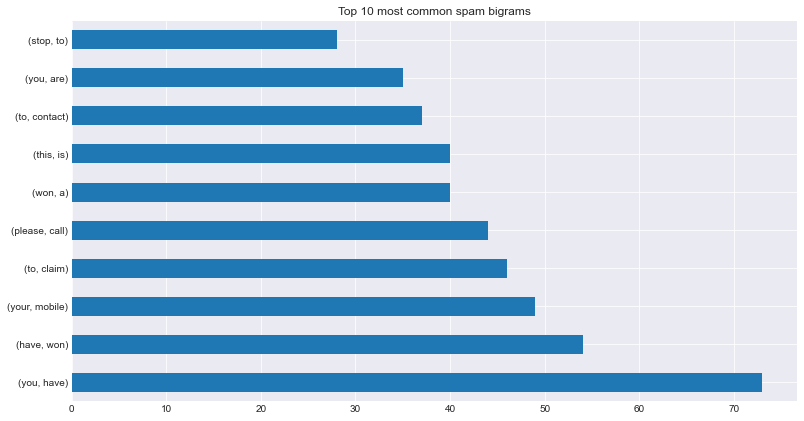

In [10]:
# find most common bigrams for each subset
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

In [11]:
# let's see how this varies when removing stopwords
df['clean_no_sws'] = df.clean.apply(p.remove_stopwords)

In [12]:
df.head()

,label,text,clean,clean_no_sws
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [13]:
# combine all words from each label as a single corpus
ham_words = ' '.join(df[df.label == 'ham'].clean_no_sws)
spam_words = ' '.join(df[df.label == 'spam'].clean_no_sws)
all_words = ' '.join(df.clean_no_sws)

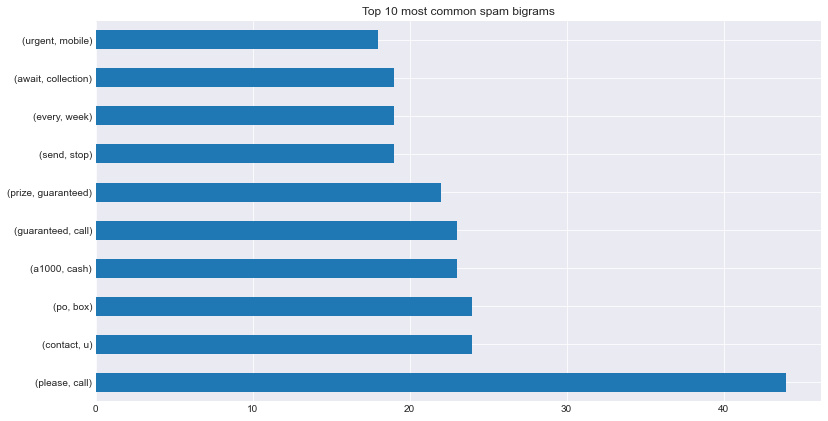

In [14]:
# find most common bigrams for each subset
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

In [15]:
len(spam_words.split())

12505

In [16]:
# create frequency series
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [17]:
# create word counts df
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'All']
word_counts.head()

,ham,spam,All
u,986,147,1133
im,449,13,462
2,305,173,478
get,303,83,386
ltgt,276,0,276


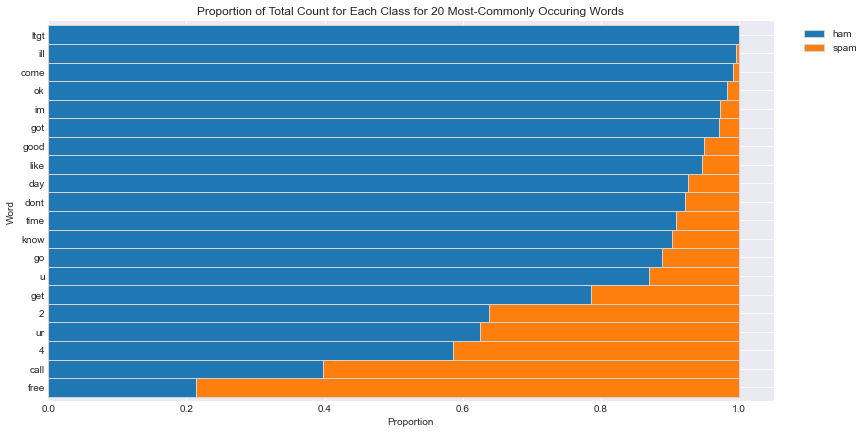

In [18]:
e.plot_stacked_all(word_counts)

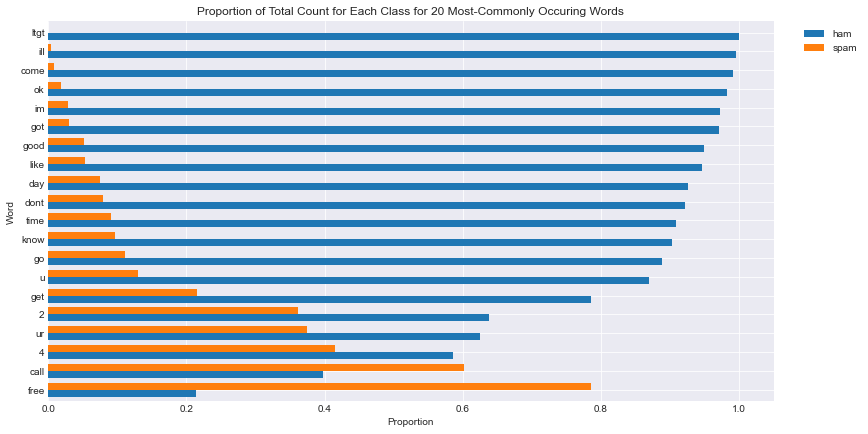

In [20]:
e.plot_bar_all(word_counts)

In [21]:
word_counts

,ham,spam,All
u,986,147,1133
im,449,13,462
2,305,173,478
get,303,83,386
ltgt,276,0,276
...,...,...,...
call2optout4qf2,0,1,1
olympics,0,1,1
hottest,0,1,1
maximum,0,1,1


<Figure size 1152x648 with 0 Axes>

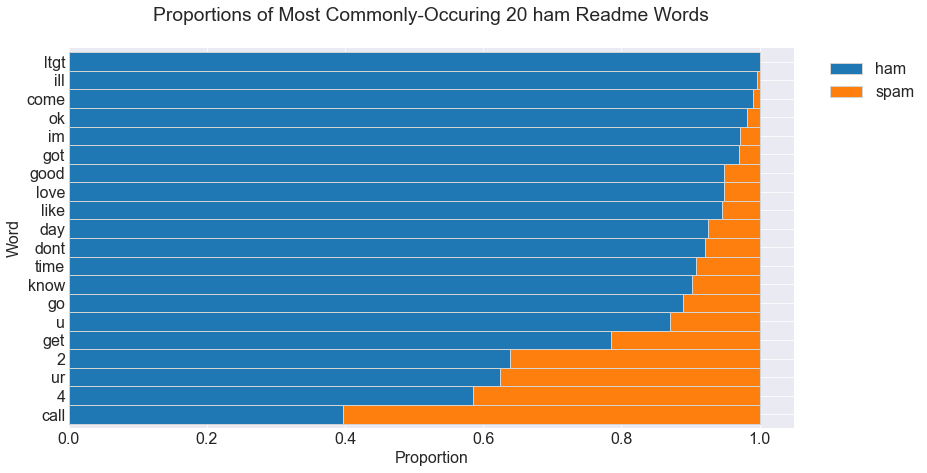

In [23]:
e.plot_stacked_bar(word_counts, 'ham');

<Figure size 1152x648 with 0 Axes>

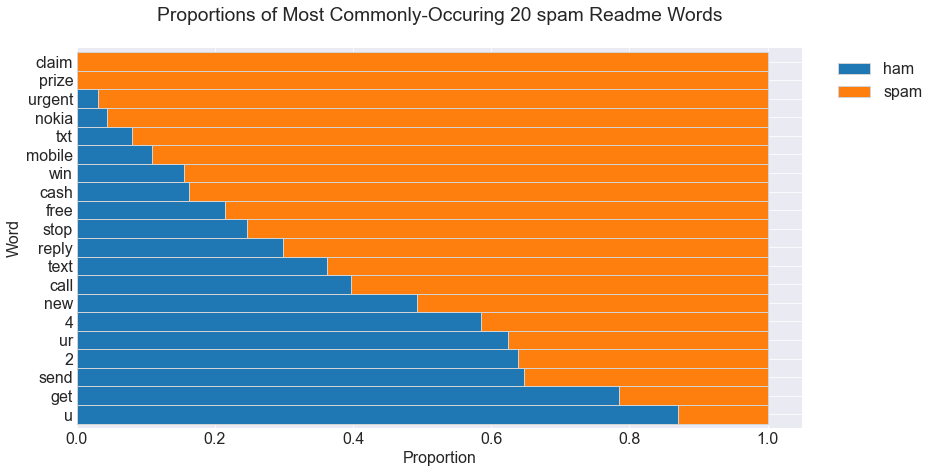

In [24]:
e.plot_stacked_bar(word_counts, 'spam');

- Is there any overlap in the bigrams for the spam data and the ham data?

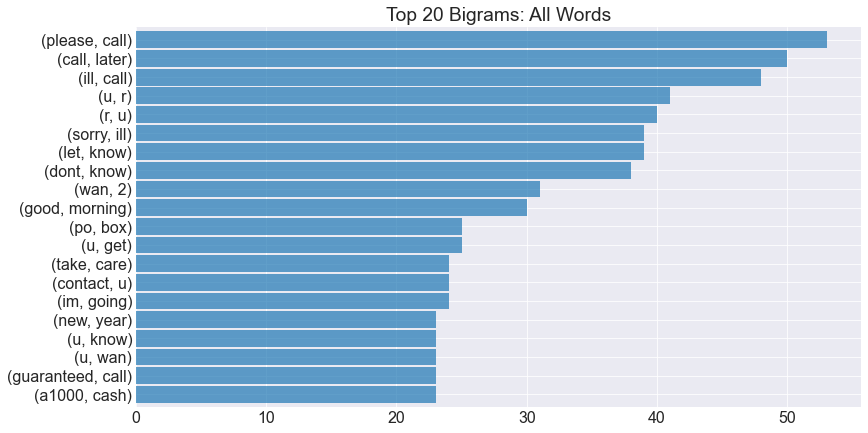

In [27]:
e.bigram_count(all_words, lang_name="All Words")

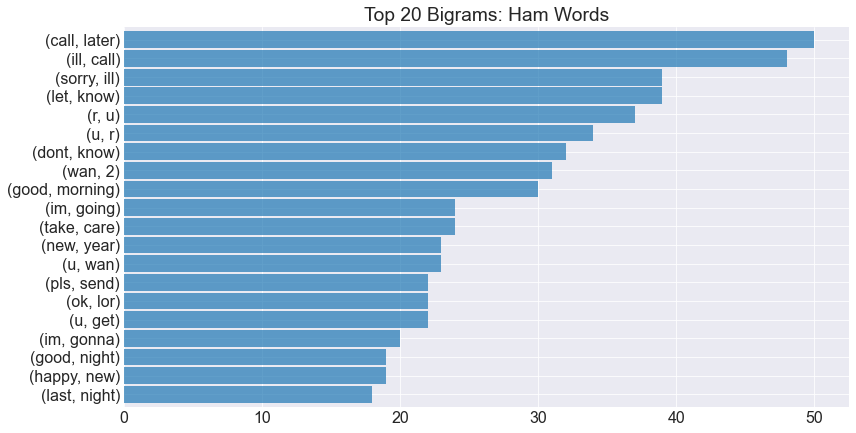

In [28]:
e.bigram_count(ham_words, lang_name="Ham Words")

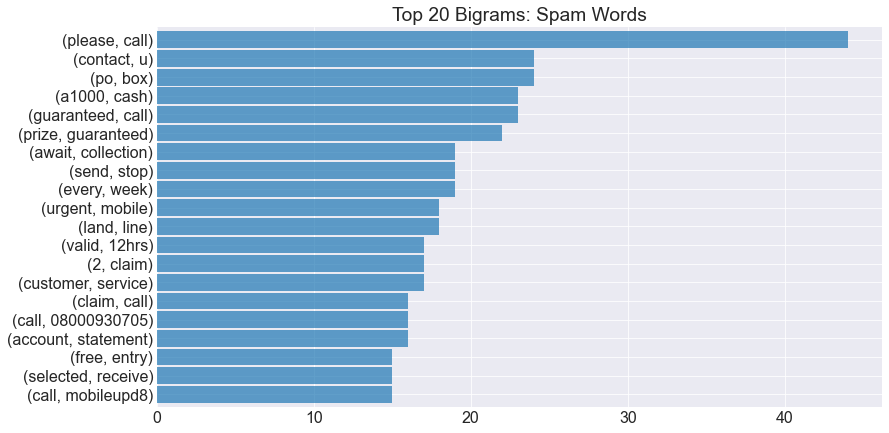

In [29]:
e.bigram_count(spam_words, lang_name="Spam Words")

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

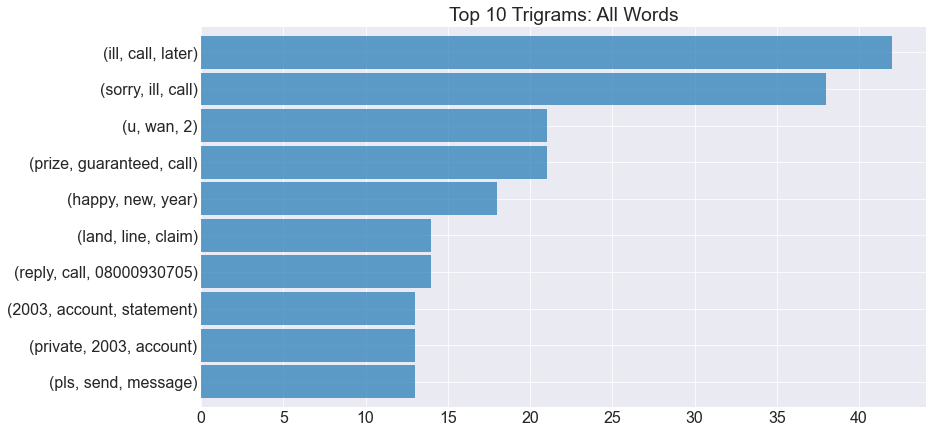

In [30]:
e.trigram_count(all_words, lang_name='All Words')

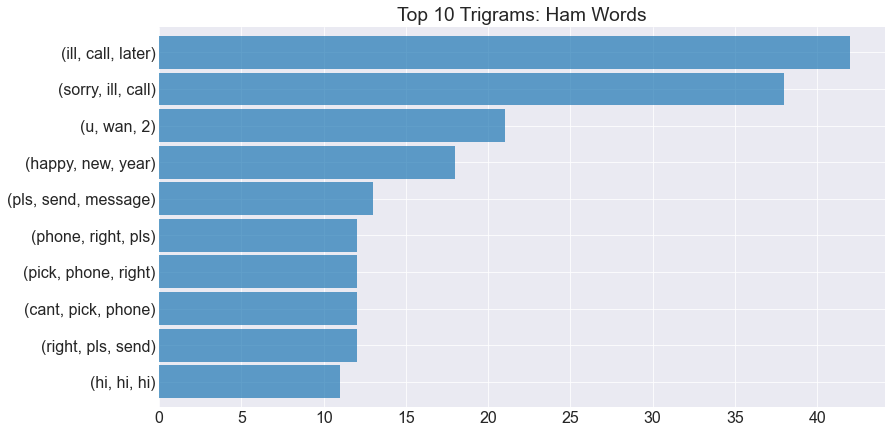

In [31]:
e.trigram_count(ham_words, lang_name='Ham Words')

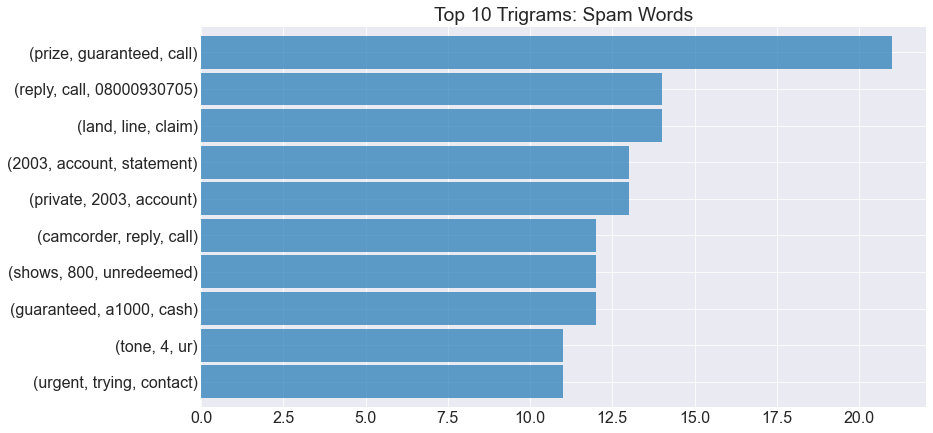

In [32]:
e.trigram_count(spam_words, lang_name='Spam Words')

---
## 2.

Explore the blog articles using the techniques discussed in the exploration lesson.

---
## 3.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.